In [2]:
import numpy as np

In [3]:
MAX_ITEMS = 100
MAX_T = 500

actions = np.asarray([200.0, 100.0, 50.0])
p = np.asarray([0.1, 0.5, 0.8])
p_matrix = np.asarray([p, 1 - p])
v_matrix = np.zeros(shape=(MAX_ITEMS + 1, MAX_T + 1))
alpha_matrix = np.ones(shape=v_matrix.shape) * 99

for t in range(1, MAX_T + 1):
    a = (p * actions) + np.asarray([v_matrix[:-1, t - 1], v_matrix[1:, t - 1]]).T.dot(p_matrix)
    v_matrix[1:, t] = np.max(a, axis=1)
    alpha_matrix[1:, t] = np.argmax(a, axis=1)
    

In [4]:
alpha_matrix[alpha_matrix == 2]

array([], dtype=float64)

In [5]:
100 * 200

20000

## Plotting the optimal policy

<Axes: >

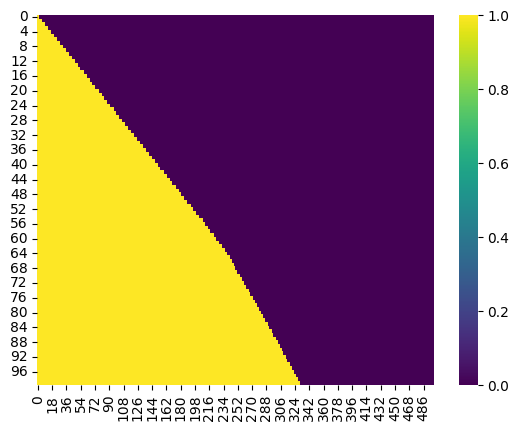

In [6]:
# plot the optimal policy as a heatmap with sns
import seaborn as sns

sns.heatmap(alpha_matrix[1:,1:], cmap='viridis')




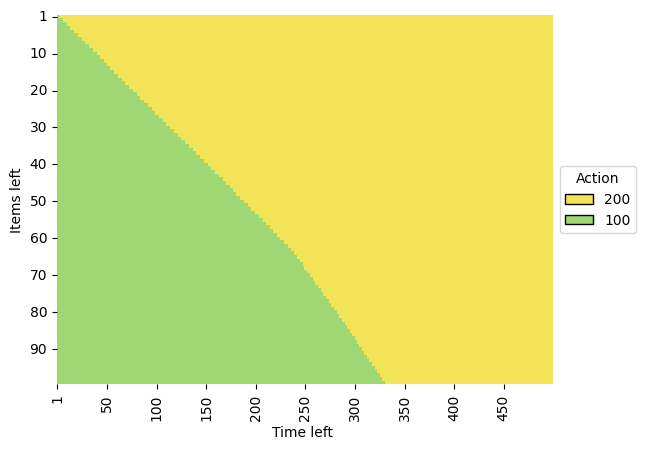

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sns.heatmap(alpha_matrix[1:,1:], cmap= ["#F3E457","#9FD772"], ax=ax, cbar=False)

ax.set_yticks(np.arange(0, 100, 10) + 0.5) # ticks position

ax.set_yticklabels(np.concatenate([np.asarray([1]), np.arange(10, 100, 10)])) 

ax.set_xticks(np.arange(0, 500, 50) + 0.5)

ax.set_xticklabels(np.concat([np.asarray([1]),  np.arange(50, 500, 50)]))



# set the x and y labels
ax.set_xlabel('Time left ')

ax.set_ylabel('Items left')

# create a legend on the right side of the plot
import matplotlib.patches as mpatches

legend_elements = [mpatches.Patch(facecolor='#F3E457', edgecolor='black', label='200'), mpatches.Patch(facecolor='#9FD772', edgecolor='black', label='100')]

ax.legend(handles=legend_elements, title='Action', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


